/tmp/ipykernel_14900/1248628816.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


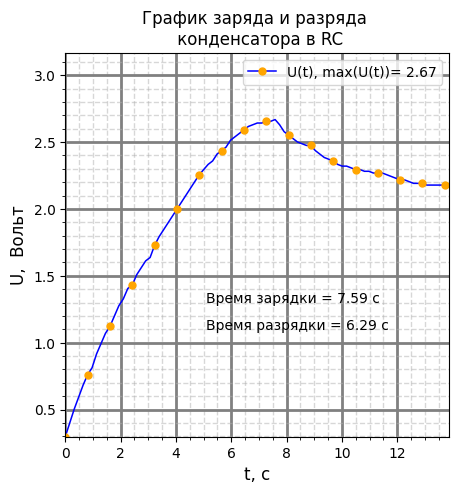

In [61]:
import numpy as np 
import matplotlib.pyplot as plt 

y = []

#чтение данных
with open('data.txt') as f:
    for line in f:
        y.append(int(line[:-1]))
# чтение файла конфигурации
step = 0
period = 0
time_exper = 0
time_charge = 0
with open('settings.txt') as f:
    period = 1/float(f.readline()[:-1])
    step = float(f.readline()[:-1])

y = np.array(y)
y = y * step
fig = plt.figure()
x = np.arange(0,len(y), 1) * period
ax = fig.add_axes([0.2, 0.1, 0.6, 0.8])
ax.set_title('График заряда и разряда \n конденсатора в RC')
#fig.set_dpi(300)
plt.minorticks_on()
ax.grid(which = 'major', c = 'grey', lw = 2)
ax.grid(ls = 'dashed', alpha = 0.5, which = 'minor', lw = 1)
ax.set_ylabel(r'U,  Вольт',  fontsize = 12)
ax.set_xlabel(r't, c',  fontsize = 12)
plt.plot(x,y,ls = '-',marker = "o", ms=5, markevery = 5, c = 'b',mec = 'orange', markerfacecolor = 'orange', lw = 1.1, label = 'U(t), max(U(t))= {:.2f}'.format(max_y))

max_y = max(y)
id = np.where(y == max_y)
time_charge = x[id]
ax.legend()
ax.text(5.1,1.3,'Время зарядки = {:.2f} с'.format(float(time_charge[0])))
ax.text(5.1,1.1,'Время разрядки = {:.2f} с'.format(float(x[len(x)-1]) - float(time_charge[0])))
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y)+0.5)
plt.savefig('plot.svg')
fig.tight_layout()
plt.show()
None